# DA_FRENCH_Assignement2_ALEXANDRE_DAIGLE_alexdaigle13@gmail.com

# PART 1: Analysis on New York City Restaurants

## 1.1 DATA LOADING

In [1]:
import pandas
pandas.__version__

'1.5.3'

In [2]:
### TASK 1
import pandas as pd
df = pd.read_csv("food_order.csv")

In [3]:
### TASK 2
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


## 1.2 DATA DESCRIPTION

In [4]:
### TASK 3
food_order = pd.read_csv('food_order.csv')
print(food_order.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [5]:
### TASK 4
def null_rate(df):
    num_rows = len(df)
    null_counts = df.isnull().sum()
    null_rates = null_counts / num_rows * 100
    return null_rates
null_rates = null_rate(df)
print(null_rates)

order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64


In [6]:
food_order.dropna(inplace=True)

In [7]:
### TASK 5
unique_counts = df.nunique()
print(unique_counts)

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


## 1.3 DATA MANIPULATION

In [8]:
### TASK 6
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

In [9]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


## 1.4 STATISTICS

In [10]:
### TASK 7
cuisine_type = df['cuisine_type'].unique()
print(cuisine_type)

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


In [11]:
### TASK 8
restaurant_counts = df.groupby('cuisine_type').size()
print(restaurant_counts)

cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
dtype: int64


## 1.4 VISUALIZATION

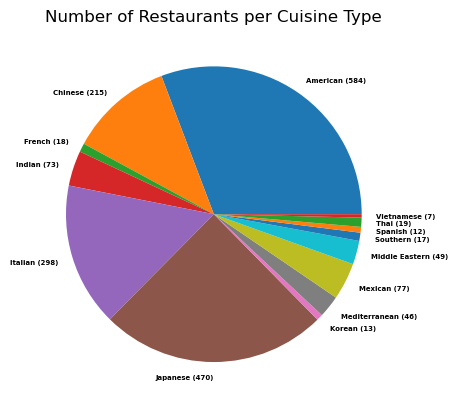

In [12]:
### TASK 9A
import matplotlib.pyplot as plt
restaurant_counts = df.groupby('cuisine_type').size()
plt.pie(restaurant_counts, labels=[f"{x} ({y})" for x,y in zip(restaurant_counts.index, restaurant_counts)], 
        textprops={'fontsize': 5,'fontweight': 'bold'})
plt.title('Number of Restaurants per Cuisine Type')
plt.show()

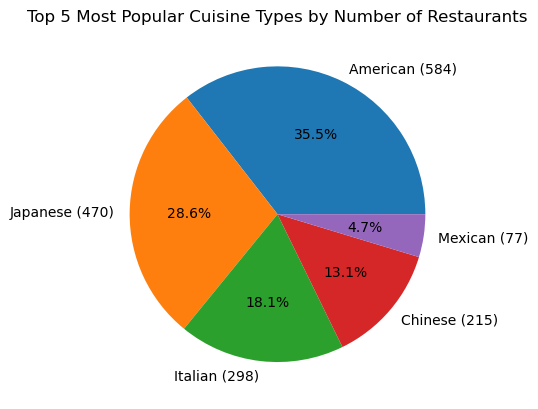

In [13]:
### TASK 9B
restaurant_counts = df.groupby('cuisine_type').size()
top_restaurant_counts = restaurant_counts.nlargest(5)
labels = [f"{cuisine} ({count})" for cuisine, count in top_restaurant_counts.items()]
plt.pie(top_restaurant_counts, labels=labels, autopct='%1.1f%%')
plt.title('Top 5 Most Popular Cuisine Types by Number of Restaurants')
plt.show()

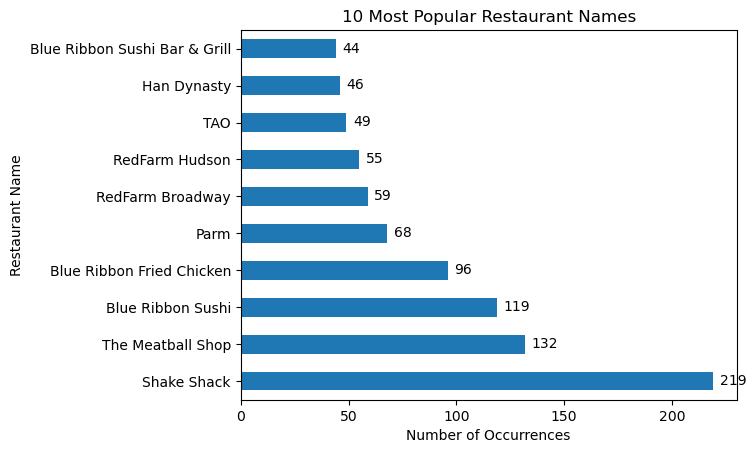

In [14]:
### TASK 10A
restaurant_counts = df['restaurant_name'].value_counts().head(10)
ax = restaurant_counts.plot.barh()
plt.xlabel('Number of Occurrences')
plt.ylabel('Restaurant Name')
plt.title('10 Most Popular Restaurant Names')
for i, v in enumerate(restaurant_counts.values):
    ax.text(v + 3, i - 0.1, str(v), color='black')

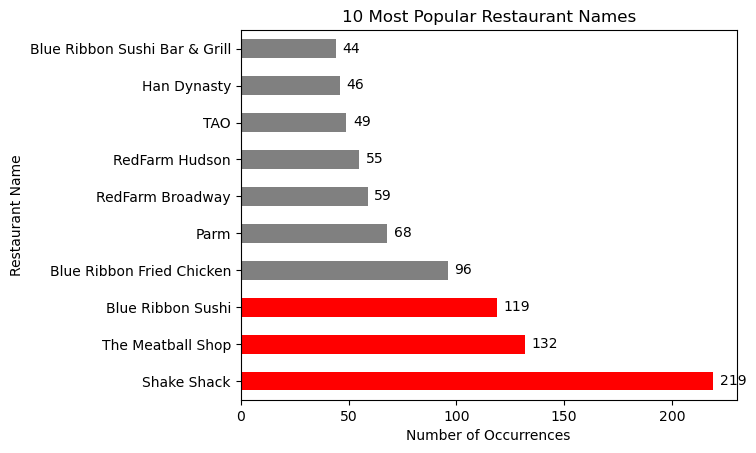

In [15]:
### TASK 10B
restaurant_counts = df['restaurant_name'].value_counts().head(10)
ax = restaurant_counts.plot.barh(color=['grey' if i > 2 else 'red' for i in range(10)])
plt.xlabel('Number of Occurrences')
plt.ylabel('Restaurant Name')
plt.title('10 Most Popular Restaurant Names')
for i, v in enumerate(restaurant_counts.values):
    ax.text(v + 3, i - 0.1, str(v), color='black')

C:\Users\alexd\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


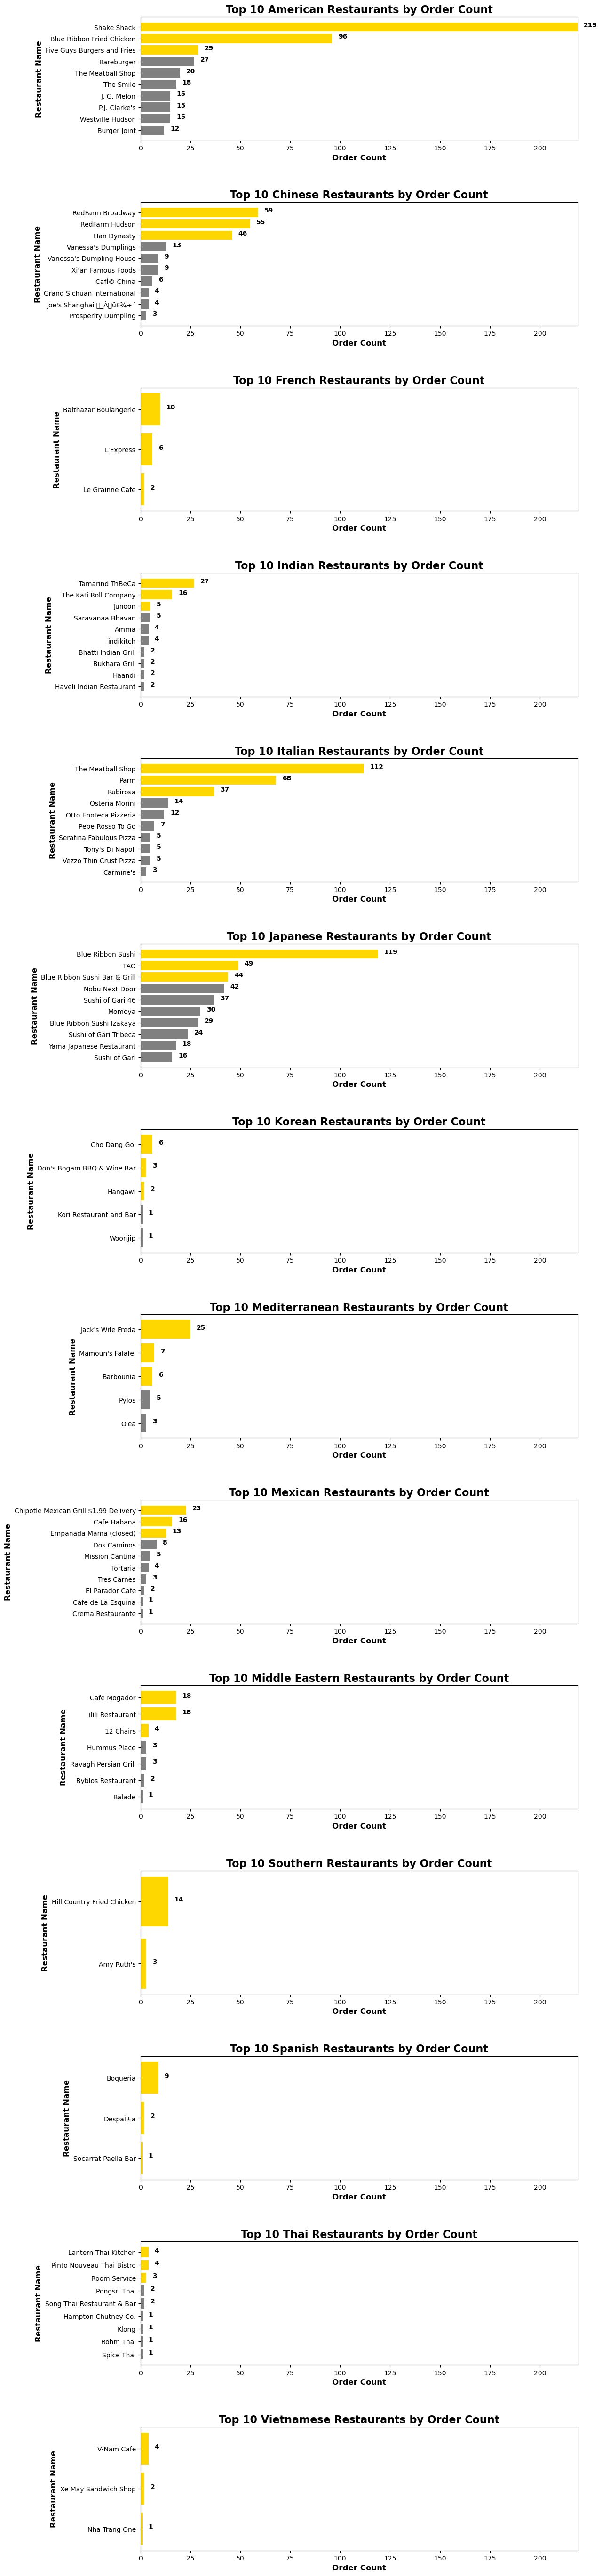

In [16]:
### TASK 11
restaurant_counts2 = food_order.groupby(['restaurant_name', 'cuisine_type']).size().reset_index(name='order_count')
restaurant_counts2 = restaurant_counts2.sort_values(['cuisine_type', 'order_count'], ascending=[True, False])
top_restaurants = restaurant_counts2.groupby('cuisine_type').head(10)
max_order_count = top_restaurants['order_count'].max()
num_subplots = len(top_restaurants['cuisine_type'].unique())
fig, axes = plt.subplots(nrows=num_subplots, figsize=(12, 5*num_subplots))

for i, (cuisine_type, ax) in enumerate(zip(top_restaurants['cuisine_type'].unique(), axes)):
    subset = top_restaurants[top_restaurants['cuisine_type'] == cuisine_type]
    colors = ['gold' if x in subset['restaurant_name'].values[:3] else 'gray' for x in subset['restaurant_name']]
    ax.barh(subset['restaurant_name'], subset['order_count'], color=colors)
    ax.set_title(f'Top 10 {cuisine_type} Restaurants by Order Count', fontsize=16, fontweight='bold')
    ax.set_xlabel('Order Count', fontsize=12, fontweight='bold')
    ax.set_ylabel('Restaurant Name', fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    ax.set_xlim([0, max_order_count])
    for i, v in enumerate(subset['order_count']):
        ax.text(v + 3, i, str(v), color='black', fontweight='bold')

fig.subplots_adjust(hspace=0.5)
plt.show()

In [17]:
### TASK 12A
shakeshack = df[df['restaurant_name'] == 'Shake Shack']
proportion = shakeshack['rating'].value_counts(normalize=True)

print(proportion)

Not given    0.392694
5            0.273973
4            0.228311
3            0.105023
Name: rating, dtype: float64


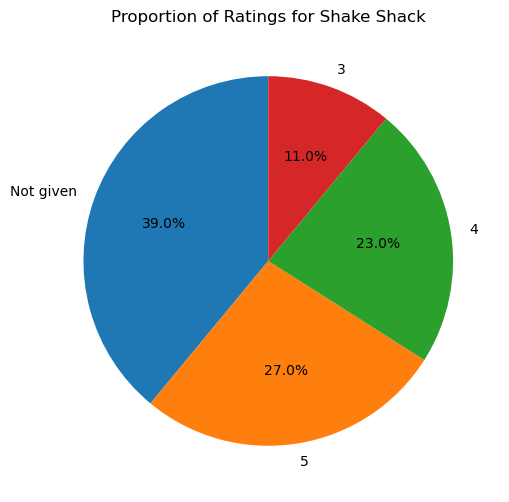

In [18]:
### TASK 12B
shakeshack_df = df[df['restaurant_name'] == 'Shake Shack']
ratings_count = shakeshack_df['rating'].value_counts(normalize=True)
ratings_count = ratings_count.round(2)
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(ratings_count, labels=ratings_count.index, autopct='%1.1f%%', startangle=90)
ax.set_title("Proportion of Ratings for Shake Shack")
plt.show()

C:\Users\alexd\AppData\Local\Temp\ipykernel_33908\2075815651.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  color_bar = plt.colorbar(color_map)


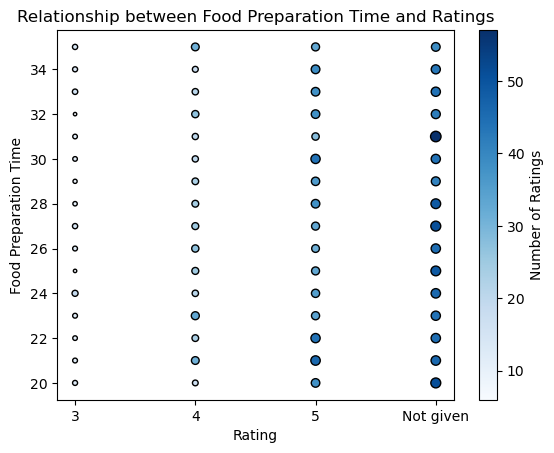

In [19]:
### TASK 13
import matplotlib.cm as cm

popularity = food_order.groupby(['rating', 'food_preparation_time']).size().reset_index(name='popularity')

color_map = cm.ScalarMappable(cmap='Blues')
color_map.set_array(popularity['popularity'])
plt.scatter(popularity['rating'], popularity['food_preparation_time'], s=popularity['popularity'], c=color_map.to_rgba(popularity['popularity']), edgecolors='black')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.title('Relationship between Food Preparation Time and Ratings')
color_bar = plt.colorbar(color_map)
color_bar.set_label('Number of Ratings')
plt.show()

In [20]:
### The food preparation time does not seem to affect the rating.
### People tend to either give a high rating (5) or no rating at all (Not given) regardless of the food preparation time.

# PART 2: Sentiment Analysis on Tweets

## 2.1 DATA LOADING

In [21]:
### TASK 1
import pandas as pd
df = pd.read_csv("tweets.csv")

In [22]:
### TASK 2
df.tail(10)

,Tweets,Retweets,Likes,Date
3050,@cybrtrkguy Vote them out,7712,68748,2022-01-27 23:41:28
3051,"If you scare people enough, they will demand r...",119804,543466,2022-01-27 23:39:57
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,2022-01-27 22:24:24
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,2022-01-27 22:05:43
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,2022-01-27 22:03:29
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09


## 2.2 DATA CLEANING

In [23]:
import re
from textblob import TextBlob

In [24]:
### TASK 12

df = pd.read_csv("tweets.csv")
df['tweet_cleaned'] = df['Tweets']

In [25]:
### TASK 3
def clean_hyperlinks(tweet):
    cleaned_hyperlinks = re.sub(r'http\S+', '', tweet)
    return cleaned_hyperlinks
df['tweet_cleaned'] = df['tweet_cleaned'].apply(clean_hyperlinks)

In [26]:
### TASK 5
def clean_mentions(tweet):
    cleaned_mentions = re.sub(r'@\S+', '', tweet)
    return cleaned_mentions
df['tweet_cleaned'] = df['tweet_cleaned'].apply(clean_mentions)


In [27]:
### TASK 6
def clean_hashtags(tweet):
    cleaned_hashtags = re.sub(r'#([^\s]+)', r'\1', tweet)
    return cleaned_hashtags
df['tweet_cleaned'] = df['tweet_cleaned'].apply(clean_hashtags)

In [28]:
### TASK 7
def clean_punctuation(tweet):
    cleaned_punctuation = re.sub(r'[^\w\s]', '', tweet)
    return cleaned_punctuation
df['tweet_cleaned'] = df['tweet_cleaned'].apply(clean_punctuation)

In [29]:
### TASK 4
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens)
df['tweet_cleaned'] = df['tweet_cleaned'].apply(clean_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
### TASK 8
df['tweet_cleaned'] = df['tweet_cleaned'].str.replace('RT', '')

In [31]:
### TASK 9
import demoji

def remove_emojis(text):
    return demoji.replace(text, '')
df['tweet_cleaned'] = df['tweet_cleaned'].apply(remove_emojis)

In [32]:
### TASK 10
df['tweet_cleaned'] = df['tweet_cleaned'].str.strip()

In [33]:
### TASK 11
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(tweet):
    lemmatized_tweet = []
    for word in tweet.split():
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_tweet.append(lemmatized_word)
    return ' '.join(lemmatized_tweet)
df['tweet_cleaned'] = df['tweet_cleaned'].apply(lemmatize_tweet)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
df.head(5)

,Tweets,Retweets,Likes,Date,tweet_cleaned
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today


## 2.3 SENTIMENT ANALYSIS

In [35]:
### TASK 13A
### We would not manually annotate our whole database, because:
###    - It would be too time-consuming do it manually;
###    - We want an impartial jugdment that is based on pre-set principles;
###    - There would be a higher margin of error.

In [36]:
### TASK 13B
def getPolarity ( twt ):
    return TextBlob (twt). sentiment . polarity
df['Polarity'] = df['tweet_cleaned']. apply ( getPolarity )

In [37]:
### TASK 14
def get_sentiment(Polarity):
    if Polarity > 0:
        return 'positive'
    elif Polarity < 0:
        return 'negative'
    else:
        return 'neutral'
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

In [38]:
df.head(5)

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity,Sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.20,positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,neutral
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,,0.00,neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,0.35,positive


In [39]:
sentiment_counts = df['Sentiment'].value_counts()

print("Positive tweets:", sentiment_counts['positive'])
print("Negative tweets:", sentiment_counts['negative'])
print("Neutral tweets:", sentiment_counts['neutral'])

Positive tweets: 1207
Negative tweets: 356
Neutral tweets: 1497


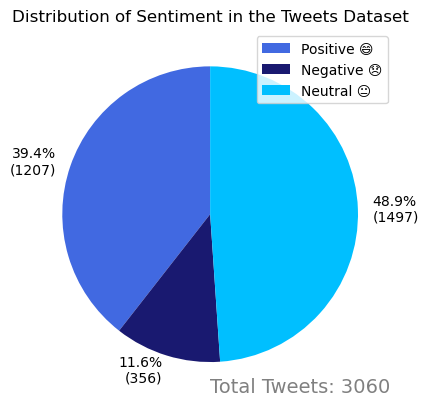

In [40]:
### TASK 15
sentiment_counts = df['Sentiment'].value_counts()

labels = ['Positive 😄', 'Negative 😞', 'Neutral 😐']
sizes = [sentiment_counts['positive'], sentiment_counts['negative'], sentiment_counts['neutral']]
colors = ['royalblue', 'midnightblue', 'deepskyblue']

label_pct = ['{:.1f}%\n({})'.format(sizes[i]/sum(sizes)*100, sizes[i]) for i in range(len(sizes))]
plt.pie(sizes, labels=label_pct, colors=colors, startangle=90)
plt.legend(labels, loc='best')
plt.title('Distribution of Sentiment in the Tweets Dataset')
plt.annotate('Total Tweets: {}'.format(sum(sizes)), xy=(0, -1.2), fontsize=14, color='gray', ha='left')
plt.show()

In [41]:
### Close to half (48.9%) of all tweets have a neutral sentiment.
### When comparing positive and negative sentiments, there are about 3 times more positve sentiments than negative ones.

In [42]:
### TASK 16A
from collections import Counter

grouped = df.groupby('Sentiment')

positive_tweets = grouped.get_group('positive')
negative_tweets = grouped.get_group('negative')
neutral_tweets = grouped.get_group('neutral')

def get_most_common_words(tweets):
    words = []
    for tweet in tweets:
        words += tweet.split()
    word_count = Counter(words)
    return word_count.most_common(10)

positive_words = get_most_common_words(positive_tweets['tweet_cleaned'])
negative_words = get_most_common_words(negative_tweets['tweet_cleaned'])
neutral_words = get_most_common_words(neutral_tweets['tweet_cleaned'])

print("10 most common words in positive tweets:")
print(positive_words)
print("\n10 most common words in negative tweets:")
print(negative_words)
print("\n10 most common words in neutral tweets:")
print(neutral_words)

10 most common words in positive tweets:
[('amp', 155), ('Tesla', 78), ('people', 61), ('much', 61), ('many', 61), ('good', 60), ('would', 56), ('time', 51), ('Twitter', 49), ('True', 47)]

10 most common words in negative tweets:
[('amp', 86), ('Tesla', 29), ('year', 23), ('bad', 19), ('time', 19), ('would', 18), ('Starlink', 18), ('one', 17), ('people', 17), ('like', 16)]

10 most common words in neutral tweets:
[('Yes', 63), ('amp', 44), ('Tesla', 41), ('Yeah', 31), ('year', 31), ('time', 26), ('Starlink', 25), ('Yup', 24), ('Twitter', 23), ('Im', 20)]


C:\Users\alexd\AppData\Local\Temp\ipykernel_33908\820655015.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pos_words, rotation=45)
C:\Users\alexd\AppData\Local\Temp\ipykernel_33908\820655015.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(neg_words, rotation=45)
C:\Users\alexd\AppData\Local\Temp\ipykernel_33908\820655015.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(neut_words, rotation=45)


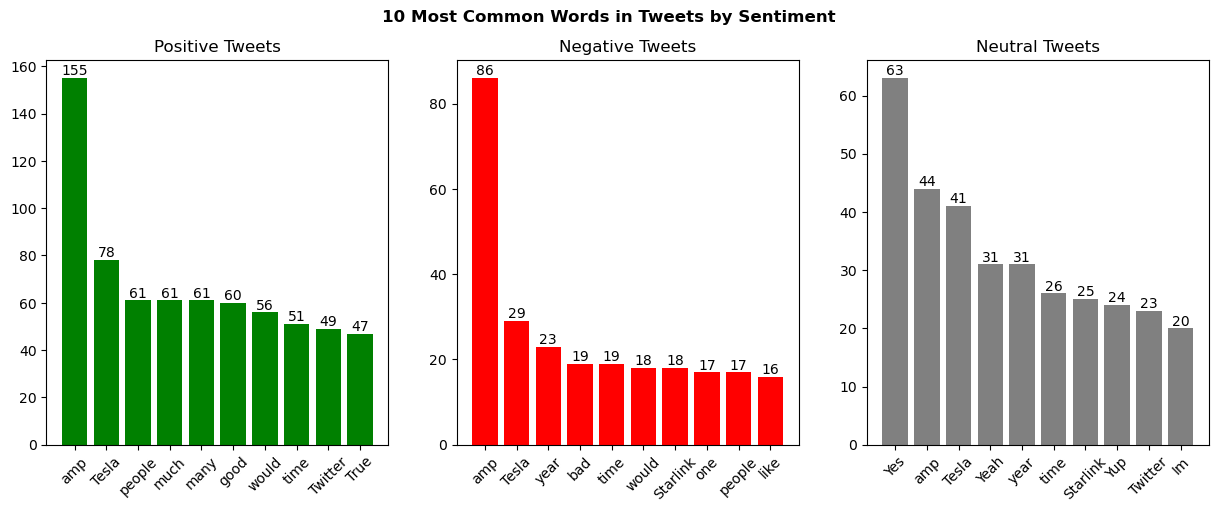

In [43]:
### TASK 16B
grouped = df.groupby('Sentiment')

positive_tweets = grouped.get_group('positive')
negative_tweets = grouped.get_group('negative')
neutral_tweets = grouped.get_group('neutral')

def get_most_common_words(tweets):
    words = []
    for tweet in tweets:
        words += tweet.split()
    word_count = Counter(words)
    return word_count.most_common(10)

positive_words = get_most_common_words(positive_tweets['tweet_cleaned'])
negative_words = get_most_common_words(negative_tweets['tweet_cleaned'])
neutral_words = get_most_common_words(neutral_tweets['tweet_cleaned'])

pos_words, pos_counts = zip(*positive_words)
neg_words, neg_counts = zip(*negative_words)
neut_words, neut_counts = zip(*neutral_words)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
ax1.bar(pos_words, pos_counts, color='green')
ax1.set_title('Positive Tweets')
ax1.set_xticklabels(pos_words, rotation=45)
ax2.bar(neg_words, neg_counts, color='red')
ax2.set_title('Negative Tweets')
ax2.set_xticklabels(neg_words, rotation=45)
ax3.bar(neut_words, neut_counts, color='grey')
ax3.set_title('Neutral Tweets')
ax3.set_xticklabels(neut_words, rotation=45)

for ax in (ax1, ax2, ax3):
    for i, v in enumerate(ax.containers):
        ax.bar_label(v, labels=[f'{c}' for c in v.datavalues], label_type='edge')

fig.suptitle('10 Most Common Words in Tweets by Sentiment', fontweight='bold')
plt.show()

In [44]:
### "amp" is the most popular word overall; it ranked first in positive and negative tweets, and second in neutral tweets.
### The word "Tesla" appeared more often in positive tweets (78 times) than in negative and neutral tweets combined (70),
### which would suggest that the opinion on Tesla is likely favorable. Although 29/356 negative tweets (8.15%) are
### about Tesla, while only 78/1207 positive tweets (6.46%) are about Tesla, which means that while Tesla has a higher number
### of positive tweets, it also has a higher percentage of prevalence when looking at negative tweets.

In [45]:
sentiment_data = df.groupby('Sentiment')[['Likes', 'Retweets']].sum()
print(sentiment_data)

               Likes  Retweets
Sentiment                     
negative    26327614   2423619
neutral    110280417   9239436
positive    79872826   6230147


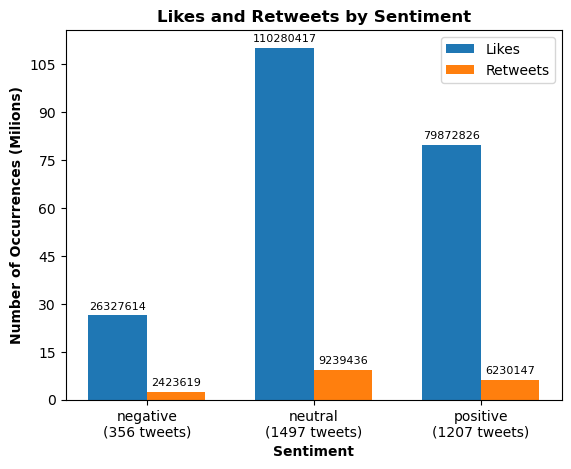

In [46]:
### TASK 17
import matplotlib.ticker as ticker

sentiment_data = df.groupby('Sentiment')[['Likes', 'Retweets']].sum()

fig, ax = plt.subplots()
x = range(len(sentiment_data))
bar_width = 0.35
likes_bars = ax.bar(x, sentiment_data['Likes'], bar_width, label='Likes')
retweets_bars = ax.bar([i + bar_width for i in x], sentiment_data['Retweets'], bar_width, label='Retweets')

ax.set_title('Likes and Retweets by Sentiment', fontweight='bold')
ax.set_xlabel('Sentiment', fontweight='bold')
ax.set_ylabel('Number of Occurrences (Milions)', fontweight='bold')

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels([f"{s}\n({sentiment_counts[s]} tweets)" for s in sentiment_data.index])

ax.legend()

for bar in [likes_bars, retweets_bars]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)
        
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}'))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

In [47]:
### It appears that likes are proportional to the amount of tweets and do not seem to change based on the sentiment of the tweet.
### For retweets, tweets with a negative sentiment have a slightly higher number of retweet proportionally,
### when compared with the positive and neutral sentiments.